# Question 3 <a class="tocSkip"></a>

Solve the minimisation problem

$$
f(x, y) = x^2 + \frac{y^4}{12} - \frac{y^3}{6}
$$

**3.1** Find its _global mimimizer_, i.e. the $(x,y)$ for which $f(x,y)$ takes its (global) minimum value, analytically. Is the function convex? Show why it is, or is not convex.

## Solution  <a class="tocSkip"></a>

For a smooth function $f$ the global minimum will be achieved in a local minimum or at the boundaries. Here the domain of the function $f$ is unbounded, and it is clear that $f$ does not take its minimum at infinity (in any direction with $\|x\|\to\infty$) so the minimum should correspond to a local minimum, which we can find by looking for a stationary point, where all its partial derivatives are zero.

This leads to the equations:

$$
  \frac{\partial f(x,y)}{\partial x} = 2x = 0, \\
  \frac{\partial f(x,y)}{\partial y} = \frac{y^3}3 - \frac{y^2}{2} = y^2(\frac{y}3 - \frac 12) = 0
$$

which leads to the solutions $(x,y) = (0, 0)$ and $(x, y) = (0, \tfrac 32)$.

Of course not all stationary points are minima, so we could look at the second derivative, the Hessian, to try to find out more:

$$f''(x,y) = \begin{pmatrix}
\frac{\partial^2 f(x,y)}{\partial x^2} &
\frac{\partial^2 f(x,y)}{\partial x\partial y} \\
\frac{\partial^2 f(x,y)}{\partial x\partial y} &
\frac{\partial^2 f(x,y)}{\partial y^2}
\end{pmatrix}
=
\begin{pmatrix} 2 & 0 \\ 0 & y^2 - y \end{pmatrix},
$$
which in the stationary points gives:
\begin{align}
f''(0, 0) &= \begin{pmatrix} 2 & 0 \\ 0 & 0 \end{pmatrix}, \\
f''(0, \tfrac 32) &= \begin{pmatrix} 2 & 0 \\ 0 & \frac 34 \end{pmatrix}.
\end{align}

The second of these, $f''(0, \tfrac 32)$, is Symmetric Positive Definite, and thus guaranteed to be a local minimum. The first one, $f''(0,0)$, however is semi-definite, this means we cannot draw any conclusion: it could be a local minimum or a local maximum, or a saddle point. This means the Hessian here hasn't given us any further information, it is still possible that $(0,0)$ is a local minimum, and thus the global minimum could be in either $(0,0)$ or in $(0, \tfrac 32)$.

Instead, the easiest way to find out which of the two stationary points is the global minimum, is to simply evaluate the function in these two points:

$$
  f(0,0) = 0, \\
  f(0, \tfrac 32) = -\frac{9}{2^6}, \\
$$

and so it becomes clear that $(0, \tfrac 32)$ is the minimizer of this function.

For the second part, we can use the Hessian, as we know that a smooth convex function has a positive semi-definite Hessian in the (the interior of) its domain. From the expression for $f''(x,y)$ above however we can easily see that $y^2-y$ can go negative (anywhere between $y>0$ and $y<1$ in fact), and thus the Hessian $f''$ in *not* positive semi-definite there, which means that $f$ is *not* convex.

Alternatively, you can use the definition of convexity which says that the line between two points $(x_A, y_A, f(x_A, y_A))$ and $(x_B, y_B, f(x_B, y_B))$ on the graph of $f$ (seen in 3D with the values of $f$ in the third dimension), needs to be above the graph for $f$ to be convex. If we plot some of $f$ along the $x=0$ line:

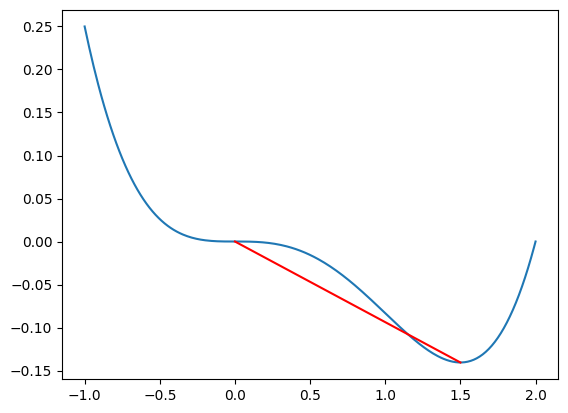

In [2]:
import matplotlib.pyplot as plt
import numpy as np
y = np.linspace(-1, 2, 300)
def f(x, y):
    return x**2 + y**4/12 - y**3/6
plt.plot(y, f(0, y))
plt.plot([0, 1.5], [f(0,0), f(0,1.5)], 'r')

We can clearly see that for the points $(0,0,f(0,0))$ and $(0,\tfrac 32,f(0,\tfrac 32)$ on the graph above the stationary points, the line connecting those is not above the graph, and thus the function is not convex.

**3.2** Implement the function $f$, and its first and second derivative as python functions. All three functions should take a length 2 list or array with the x and y value as their single argument. They should return respectively a single value, a length 2 array, and a 2x2 array.
Test the derivative functions!

## Solution <a class="tocSkip"></a>
The asked for functions are given below:

In [3]:
def f(xy):
    x, y = xy
    return x**2 + y**4/12 - y**3/6

def jac(xy):
    x, y = xy
    return np.array([2*x, y**3/3 - y**2/2])

def hess(xy):
    x,y = xy
    return np.array([[2, 0], [0, y**2 - y]])

To test that `jac` and `hess` are indeed the first and second derivative of `f`, you need to use the Taylor test. You also need to think carefully about in which point you evaluate the Taylor test. For instance, if you have chosen a point for which $x=0$, then the first $x$-derative is always zero, and if your `jac` implementation is incorrect it's not unlikely that it will still give a zero x-derivative (for instance if you have forgotten the 2 in front of the `2x`). For any hand-picked point you run the risk of accidentally passing the test - and believe me this happens more often than you would think! Therefore it is always better to pick a random point, as the chances of passing the test in a random point with a faulty implementation, are much lower.

For the Taylor test you can copy an implemenation from the lecture notes:    

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation
# scipy's optimization
import scipy.optimize as sop
import scipy.linalg as sl

# font sizes for plots
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']
def taylor_test(f, grad_f, x, h0, max_iter=8, plot_convergence=True, print_convergence=True):
    """Taylor test to verify that the function grad_f is the derivative of the function `f`
    
    We test:
    
       f(x + h) = f(x) + grad_f(x).h + O(h^2)
    
    f, grad_f  - function and its derivative to test
    x          - point in which to test
    h0         - initial perturbation
    max_iter   - number of times that h is halved
    plot_convergence - whether to plot the convergence of the Taylor residual f(x+h)-f(x)-grad_f(x).h
    print_convergence - prints the order of convergence between subsequent iterations."""


    h = h0.copy()
    residuals = []
    hnorms = []
    # these two stay the same, so we can compute them outside the loop:
    fx = f(x)
    dfdx = grad_f(x)
    
    for i in range(max_iter):
        if len(h.shape)>1:
            # tensordot sums over all indices of h and corresponding last indices of dfdx
            r = f(x + h) - fx - np.tensordot(dfdx, h, axes=len(h.shape))
        else:
            r = f(x + h) - fx - dfdx @ h
            
        residuals.append(sl.norm(r))
        hnorms.append(sl.norm(h))
        h /= 2.

    if plot_convergence:
        fig, ax = plt.subplots(1,2, figsize=(16,4))
        ax[0].semilogy(residuals)
        ax[0].set_xlabel('iteration')
        ax[0].set_ylabel('Taylor residual $|r|$')
        ax[0].set_xticks(range(0,max_iter,2))
        ax[1].loglog(hnorms, residuals)
        ax[1].set_xlabel('perturbation size $\|h\|$')
        ax[1].set_ylabel('Taylor residual $|r|$')

        # NOTE: slope_marker does not seem to work in semilogy plots
        annotation.slope_marker((1e-1, 1e-2), (2, 1), invert=True, ax=ax[1], size_frac=.2)

    if print_convergence:
        residuals = np.array(residuals)
        print('Order of convergence, log(r(h_i)/r(h_{i+1}))/log(2):')
        print(np.log(residuals[:-1]/residuals[1:])/np.log(2))

Testing the first derivative:

Order of convergence, log(r(h_i)/r(h_{i+1}))/log(2):
[2.06240405 2.02683379 2.01224415 2.00581945 2.00283294 2.00139713
 2.00069372]


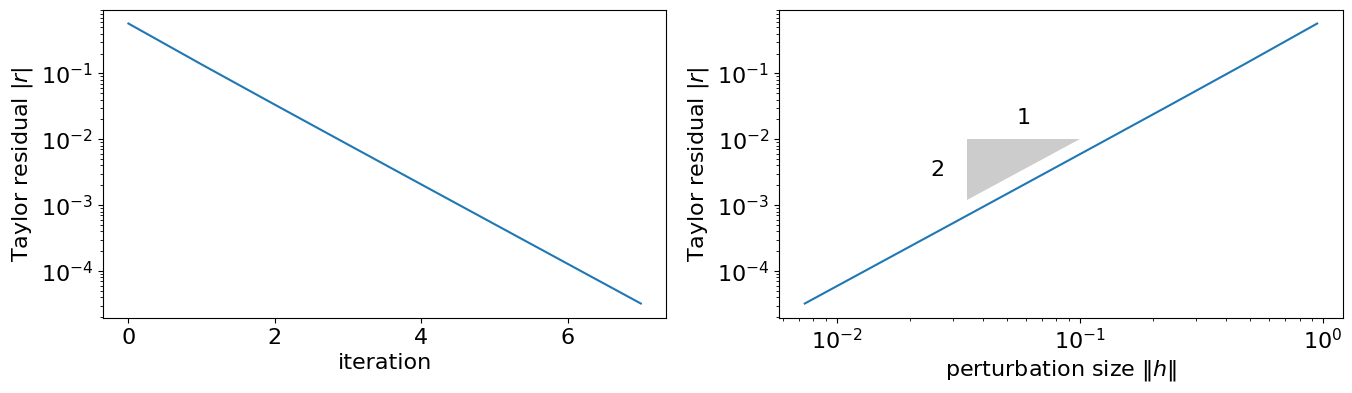

In [5]:
np.random.seed(42) # fixing the random seed to get consistent results (you can ignore this)
# choose a random point
xy = np.random.random(2)
# and a random perturbation
h0 = np.random.random(2)
taylor_test(f, jac, xy, h0)

The residual converges at second order which indicates a correct implementation.

To test the second derivative, we can either test whether `hess` is the (first) derivative of `jac`:

Order of convergence, log(r(h_i)/r(h_{i+1}))/log(2):
[0.14741111 1.55474741 1.82014231 1.91783567 1.9606085  1.98070037
 1.99044615]


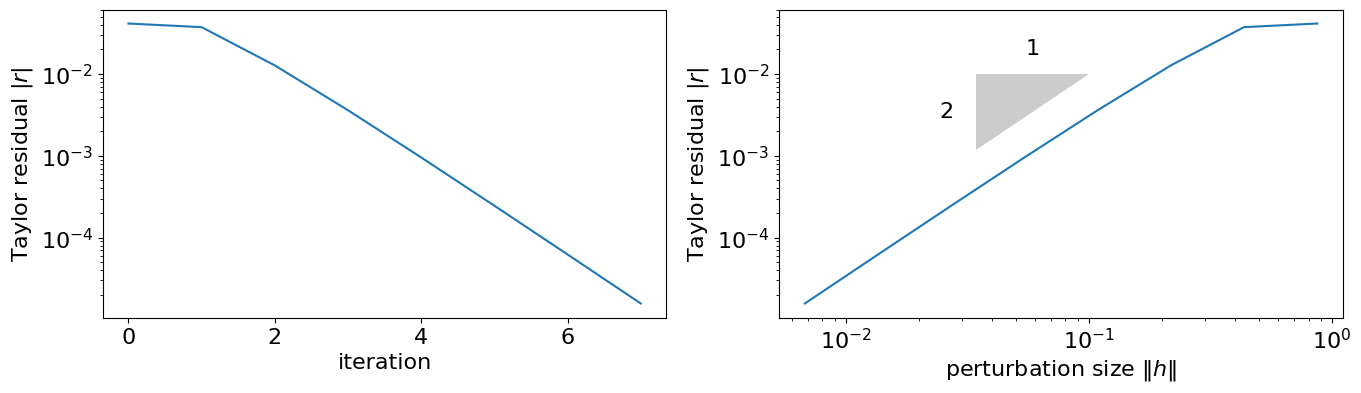

In [6]:
# choose a random point
xy = np.random.random(2)
# and a random perturbation
h0 = np.random.random(2)
taylor_test(jac, hess, xy, h0)

which again gives second order convergence, or, we can test whether the Taylor residual that includes both the first and second derivatives terms (instead of just the first) converges at *third* order:

$$
r({\bf h}) = f({\bf x} + {\bf h}) - f({\bf x}) - f'({\bf x})\cdot{\bf h}
 - \tfrac 12 {\bf h}^T f''({\bf x}){\bf h} = \mathcal{O(\|h\|^3)}\;\;
  \text{ for }\|{\bf h}\|\to 0
$$

This is implemented in the following function:

In [7]:
def taylor_test(f, grad_f, x, h0, hess=None, max_iter=8, plot_convergence=True, print_convergence=True):
    """Taylor test to verify that the function grad_f is the derivative of the function `f`
    
    We test:
    
       f(x + h) = f(x) + grad_f(x).h + 1/2 h^T.hess.h + O(h^3) 
    
    f, grad_f, hess  - function and its first and second derivatives
    x          - point in which to test
    h0         - initial perturbation
    max_iter   - number of times that h is halved
    plot_convergence - whether to plot the convergence of the Taylor residual f(x+h)-f(x)-grad_f(x).h
    print_convergence - prints the order of convergence between subsequent iterations."""


    h = h0.copy()
    residuals = []
    hnorms = []
    # these two stay the same, so we can compute them outside the loop:
    fx = f(x)
    dfdx = grad_f(x)
    if hess is not None:
        H = hess(x)
    
    for i in range(max_iter):
        if len(h.shape)>1:
            # tensordot sums over all indices of h and corresponding last indices of dfdx
            r = f(x + h) - fx - np.tensordot(dfdx, h, axes=len(h.shape))
        else:
            r = f(x + h) - fx - dfdx @ h
        if hess is not None:
            r -= 0.5 * h @ H @ h
            
        residuals.append(sl.norm(r))
        hnorms.append(sl.norm(h))
        h /= 2.

    if plot_convergence:
        fig, ax = plt.subplots(1,2, figsize=(16,4))
        ax[0].semilogy(residuals)
        ax[0].set_xlabel('iteration')
        ax[0].set_ylabel('Taylor residual $|r|$')
        ax[0].set_xticks(range(0,max_iter,2))
        ax[1].loglog(hnorms, residuals)
        ax[1].set_xlabel('perturbation size $\|h\|$')
        ax[1].set_ylabel('Taylor residual $|r|$')

        # NOTE: slope_marker does not seem to work in semilogy plots
        annotation.slope_marker((5e-2, 1e-4), (3, 1), invert=True, ax=ax[1], size_frac=.2)

    if print_convergence:
        residuals = np.array(residuals)
        print('Order of convergence, log(r(h_i)/r(h_{i+1}))/log(2):')
        print(np.log(residuals[:-1]/residuals[1:])/np.log(2))

Order of convergence, log(r(h_i)/r(h_{i+1}))/log(2):
[3.45223529 3.29349899 3.17267618 3.09476264 3.04982254 3.02557171
 3.01295786]


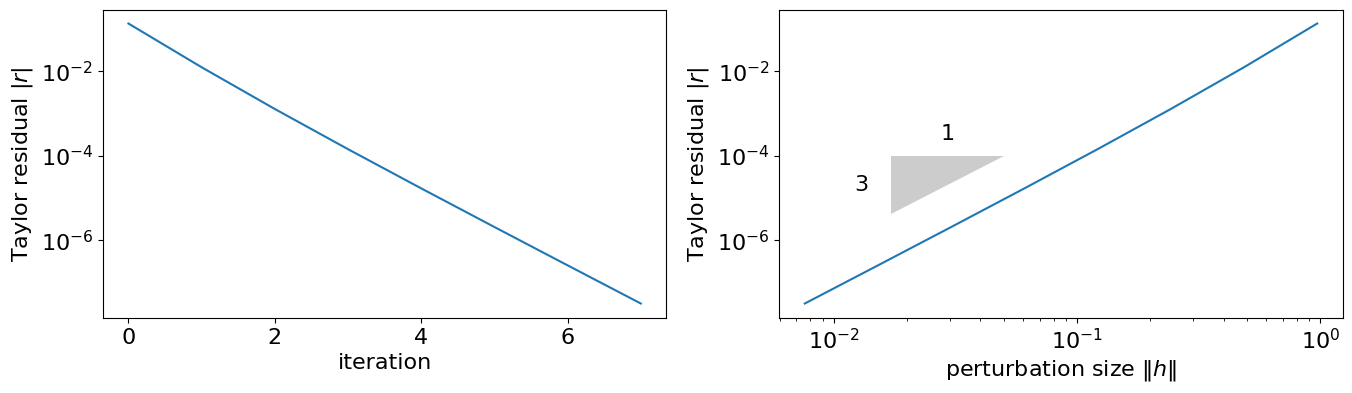

In [8]:
# choose a random point
xy = np.random.random(2)
# and a random perturbation
h0 = np.random.random(2)
taylor_test(f, jac, xy, h0, hess=hess)

which indeed shows third order converges for the extended Taylor residual, which indicates a correct implementation of the Hessian.

Note that you need all terms in the residual for this test to be valid. A few students only test the convergence of $\tfrac 12 {\bf h}^T f''({\bf x}){\bf h}$, but that expression on its own will always give second order convergence regardless of whether the function is actually the second derivative or not, simply because it is quadratic in $\bf h$ and we are looking at the limit $\bf h \to 0$.

**3.3** Try to find the minimum using a combination of Newton's method with a line search (you may use any code from the lecture notes), starting from a number of different initial guesses ${\bf x}^{(0)}$. Include at least the following as initial guess:
$$
{\bf x}^{(0)} = \begin{pmatrix} 2 \\ 2 \end{pmatrix}, \quad
{\bf x}^{(0)} = \begin{pmatrix} 0 \\ \tfrac 12 \end{pmatrix}.
{\bf x}^{(0)} = \begin{pmatrix} 0 \\ 1 \end{pmatrix}, \quad
{\bf x}^{(0)} = \begin{pmatrix} 0 \\ -1 \end{pmatrix}, \quad
$$
You will find that the method is not successful in all cases. Describe exactly what goes wrong for the cases that the method fails.

## Solution <a class="tocSkip"></a>
We use the following implementation of Newton's method:

In [9]:
def newton_method_ls(F, jac, f, line_search, x_0, tol = 1.e-5, maxiter=100, verbose=False):
    "Newton method with line search"
    x_n = []
    y_n = []
    x = x_0
    
    # iterate until we hit break either as we hit tolerance or maximum number iterations
    # since we include the initial guess, the max. number of entries is maxiter+1
    for i in range(maxiter+1):
        x_n.append(x)
        Fx = F(x)
        y_n.append(Fx)
        # Newton update:
        if isinstance(Fx, float) or len(Fx)==1:
            p = -Fx/jac(x)
        else:
            p = sl.solve(jac(x), -Fx)
                
        x, lamda, reductions = line_search(x, p, f, np.dot(F(x), p))
        if verbose:
            print("In iteration {}, x={}; {} reductions were needed (lambda={})".format(i, x_n[-1], reductions, lamda))
        if sl.norm(x - x_n[-1]) < tol:
            break
    
    return x_n, y_n

and the followin line search implementation:

In [10]:
def simple_line_search(x, p, f, initial_slope, alpha=1e-4, max_search_iter=100):
    """Simple line search that halves lambda until the Armijo rule is satisfied
    
    x - initial point (at lambda=0)
    p - search direction, search is along x+lambda*p
    f - (callback) function to minimize
    initial_slope - derivative of f in x in p-direction"""
    lamda = 1.
    if initial_slope==0.0:
        return x, 1.0, 0
    for j in range(max_search_iter):
        xt = x + lamda*p
        # check Armijo rule:
        if f(xt) - f(x) <= alpha*lamda*initial_slope:
            break
        # uncomment to follow convergence of line search:
        # print(j,lamda,f(xt)-f(x), alpha*lamda*initial_slope)
        lamda /= 2.
    else:
        raise Exception("Line search did not converge")
    return xt, lamda, j

For the first initial guess we try, we see that it successfully reaches the global minimum we have worked out in Q3.1 in only a few iterations:

In [11]:
x0 = [2, 2]
newton_method_ls(jac, hess, f, simple_line_search, x0, tol = 1.e-6, maxiter=1000, verbose=False)

([[2, 2],
  array([0.        , 1.66666667]),
  array([0.        , 1.52777778]),
  array([0.        , 1.50097466]),
  array([0.        , 1.50000126]),
  array([0. , 1.5])],
 [array([4.        , 0.66666667]),
  array([0.        , 0.15432099]),
  array([0.        , 0.02161208]),
  array([0.        , 0.00073194]),
  array([0.00000000e+00, 9.48113339e-07]),
  array([0.00000000e+00, 1.59805502e-12])])

The second suggested initial guess however is not successful:

In [12]:
x0 = [0, .5]
newton_method_ls(jac, hess, f, simple_line_search, x0, tol = 1.e-6, maxiter=1000, verbose=False)

([[0, 0.5]], [array([ 0.        , -0.08333333])])

It seems to only perform a single Newton iteration, staying in $(0, .5)$ but at this point the derivative is not zero. This requires further investigation. If we add some more print statements, or here switch on the `verbose=True` flag:

In [13]:
x0 = [0, .5]
newton_method_ls(jac, hess, f, simple_line_search, x0, tol = 1.e-6, maxiter=1000, verbose=True)

In iteration 0, x=[0, 0.5]; 54 reductions were needed (lambda=5.551115123125783e-17)


([[0, 0.5]], [array([ 0.        , -0.08333333])])

we find that the it has performed a large number of iterations in the line search, each time halving $\lambda$ starting from $\lambda=1$ and thus ending up with a tiny value for $\lambda$. We can then understand why it breaks out of the Newton iteration: the implementation above uses a stalling criterion which stops if the subsequent iterates $\bf x^{(i)}$ are too close. If you had implemented a tolerance on the norm of $f'(x)$ then it wouldn't stop immediately but still fail to make any progress and thus probably hit the maximum number of iterations.

We still need to explain however why the line search seems to have broken down, as a value of $\lambda$ that is nearly zero is of course always going to stall our iteration. This can be explained from the fact that the line search algorithm should be able to find a reasonable value of $\lambda$ _if the direction vector $\bf p$ is in a descent direction_. So let's print `p` and compute the gradient of f in that direction (it should be negative for a descent direction):

In [14]:
def newton_method_ls_with_print(F, jac, f, line_search, x_0, tol = 1.e-5, maxiter=100, verbose=False):
    "Newton method with line search"
    x_n = []
    y_n = []
    x = x_0
    
    # iterate until we hit break either as we hit tolerance or maximum number iterations
    # since we include the initial guess, the max. number of entries is maxiter+1
    for i in range(maxiter+1):
        x_n.append(x)
        Fx = F(x)
        y_n.append(Fx)
        # Newton update:
        if isinstance(Fx, float) or len(Fx)==1:
            p = -Fx/jac(x)
        else:
            p = sl.solve(jac(x), -Fx)
        # print Newton direction vector
        print("p = ", p)
        # also print derivative f'(x)=F in that direction
        print("f'(x) @ p =", F(x) @ p)
                
        x, lamda, reductions = line_search(x, p, f, np.dot(F(x), p))
        if verbose:
            print("In iteration {}, x={}; {} reductions were needed (lambda={})".format(i, x_n[-1], reductions, lamda))
        if sl.norm(x - x_n[-1]) < tol:
            break
    
    return x_n, y_n

In [15]:
x0 = [0, .5]
newton_method_ls_with_print(jac, hess, f, simple_line_search, x0, tol = 1.e-6, maxiter=1000, verbose=True)

p =  [ 0.         -0.33333333]
f'(x) @ p = 0.027777777777777783
In iteration 0, x=[0, 0.5]; 54 reductions were needed (lambda=5.551115123125783e-17)


([[0, 0.5]], [array([ 0.        , -0.08333333])])

We see that the derivative is positive, which means no matter how small $\lambda$ $f$ is increasing in that direction rather than decreasing. From the lecture notes we know that this is a direct consequence of the Hessian not being SPD in this point. So let's confirm that as well:

In [16]:
print(hess(x0))

[[ 2.    0.  ]
 [ 0.   -0.25]]


which is clearly not SPD.

Moving on to the third suggested initial guess:

In [17]:
x0 = [0, 1]
newton_method_ls(jac, hess, f, simple_line_search, x0, tol = 1.e-6, maxiter=1000, verbose=True)

LinAlgError: Matrix is singular.

Again the method is not successful, but this time we can quite easily deduce the issue from the helpful error message. It appears the matrix we are using to solve for the Newton step is singular. That matrix is of course the Hessian, which indeed

$$
  f''(0, 1)=\begin{pmatrix} 2 & 0 \\ 0 & 0 \end{pmatrix}
$$

is singular in the given point, and thus Newton's method breaks down there.

Finally, the fourth suggested initial guess:

In [ ]:
x0 = [0, -1]
newton_method_ls(jac, hess, f, simple_line_search, x0, tol = 1.e-6, maxiter=1000, verbose=False)

The method here does converge, but it converges to the other stationary point $(x,y)=(0,0)$. This is not necessarily something we can avoid, after all with a pure Newton's method 
we are just finding a point where the first derivative is zero, so you can end up in saddle point, or even a local maximum. Generally speaking a line search method does help to steer away from such points, but if your Hessian is not SPD everywhere (which will be the case if you have multiple isolated stationary points) it can easily break down as well as we saw above.

**3.4** Try two different methods implemented in [`scipy.optimize.minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) (choose ones that were discussed during the module) and see whether they are succesful at finding the minimum starting from all initial guesses. Try to explain the results using your knowledge of the methods.

## Solution <a class="tocSkip"></a>
Here I'm looking for your understanding of the behaviour of the different methods that we have discussed, and how this explains the difference the results from the previous question. Below I summarize the considerations for all relevant methods.

In the code below I loop through all gradient-based methods, and check the following:
* does the method converge succesfully, i.e. does it reach some stopping criterion and returns `result['success']==True`
* is the derivative close to zero, i.e. did we converge to a stationary point
* did we converge to the expected minimum at $(0, 1.5)$
The only output is for cases when any of these three tests fails:

In [29]:
all_methods = ['bfgs', 'l-bfgs-b', 'slsqp', 'newton-cg', 'cg', 'tnc', 'trust-ncg', 'Nelder-Mead', 'Powell']
gradient_less = ['Nelder-Mead', 'Powell']
hessian_based = ['newton-cg', 'trust-ncg']

for method in all_methods:
    if method in gradient_less:
        jacarg = None
    else:
        jacarg = jac
    
    if method in hessian_based:
        hessarg = hess
    else:
        hessarg = None
            
    print(f"{method}:")
    for x0 in [[2,2], [0,.5], [0, 1], [0,-1]]:
        result = sop.minimize(f, x0=x0, jac=jacarg, hess=hessarg, method=method, tol=1e-7)
        if method in gradient_less:
            jac_x = jac(result['x'])
        else:
            jac_x = result['jac']
        tests = [result['success'], np.allclose(jac_x, 0, atol=1e-5), np.allclose(result['x'], [0,1.5], atol=1e-5)]
        if not all(tests):
            print(x0, result['x'], jac_x, result['message'])

Nelder-Mead:
Powell:
bfgs:
[0, -1] [ 0.         -0.00036439] [ 0.00000000e+00 -6.64055544e-08] Optimization terminated successfully.
l-bfgs-b:
[0, -1] [0. 0.] [0. 0.] CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
slsqp:
[2, 2] [-6.54280744e-05  1.50015787e+00] [-0.00013086  0.00011842] Optimization terminated successfully
[0, 1] [0.         1.50029455] [0.       0.000221] Optimization terminated successfully
[0, -1] [ 0.       -0.005258] [ 0.00000000e+00 -3.62628061e-05] Optimization terminated successfully
newton-cg:
[0, 1] [0. 1.] [ 0.         -0.16666667] Optimization terminated successfully.
[0, -1] [ 0.         -0.00077078] [ 0.00000000e+00 -2.97206973e-07] Optimization terminated successfully.
cg:
[0, -1] [ 0.         -0.00036749] [ 0.00000000e+00 -6.75393481e-08] Optimization terminated successfully.
tnc:
[2, 2] [6.13907937e-06 1.50001584e+00] [1.22781587e-05 1.18772534e-05] Converged (|f_n-f_(n-1)| ~= 0)
trust-ncg:
[0, -1] [ 0.         -0.00038549] [ 0.00000000e+00 -7.432081

Here, I have also included the Nelder-Mead and Powell methods, which we didn't really discuss in the lectures. They have the advantage of not needing any gradient information at all, but generally will require a lot more iterations (and even more so for higher dimensional problems). Here these methods do perform quite well.

As you can see most of the methods are successful with initial guesses $(2,2), (0, .5),$ and $(0,1)$, but as before most of the gradient-based methods converge to $(0,0)$ when starting from $(0, -1)$. This can be explained from the fact that $(0,0)$ is downhill from $(0,-1)$ and purely looking at the gradient, $(0,0)$ is just as good a solution (stationary point) as $(0, 1.5)$. Of course with Newton methods it's not necessarily the case that the method simply follows the slope downhill, and e.g. the `tnc` method does manage to stay away from $(0,0)$ for that case. There isn't necessary a good reason why it does or not avoid the saddle point (for example `tnc` does converge to very close to $(0,0)$ when starting from $(1,-1)$ but choosing a stricter tolerance manages to get away in the end).

There are also a few cases where some of the methods do not converge to $(0, 1.5)$ exactly within the tolerances I have chosen. Unfortunately the convergence criteria differ quite a bit between the different implementations of the methods in minimize: some are set via `tol=`, some have additional tolerances via the options dictionary - so this can be a bit hard to choose consistently.

The main difference we have to explain is that the Newton and quasi Newton method seem to succesfully handle the region $0\leq y \leq 1$ where the Hessian is not SPD. The reasons for this have been discussed in the lecture:
- the bfgs/l-bfgs-b method approximate the Hessian through a reconstruction out of subsequent evaluations of the gradient and the function, but they do it in such a way that the approximation is guaranteed SPD even if the true Hessian is not
- for truncated Newton method (`newton-cg`, `tnc` are both different implementation of this method) the Newton solve that provides the new step vector $p$ is only performed very approximately with a truncated Krylov method, usually CG. In the initial iterations this means the method stays closer to a gradient descent approach (first iteration of CG is just gradient descent). Only as we get closer to a local minimum, the approximate CG solve still provides enough accuracy to still maintain the superlinear convergence of the Newton method. If we hit a direction of negative curvature in the CG method, $p^T A p< 0$, this can easily be catched in the algorithm and it can always fall back safely to a gradient descent in that case.
- in trust region methods (`trust-ncg`) the trust region is shrunk if it is detected that a proposed step does not lead to sufficient (or any) decrease of the function value. As we saw in the lectures this corresponds to modifying the Hessian in such a way that it is guaranteed to become SPD.

The method `cg` of `minimize`, is the *nonlinear* Conjugate Gradient method. Note that this is a variant of the standard Conjugate Gradient method for solving linear systems (minimizing a quadratic function) that we looked at in detail in the lectures. The nonlinear version does not require/use the Hessian matrix. To compute the $\alpha$ that determines how far we go along the search direction it simply uses a line search, so we don't have the issue of needing $p^T A p$ to be positive as in linear Conjugate Gradient. All we need for the line-search to succeed is for the search direction to be a descent direction. The search direction, as in linear CG, is a combination of the current gradient descent direction and the previous search direction, using a coefficient $\beta$. There are different ways of computing these but the scipy implementation uses the Polak-Ribière formula. The $\beta$ can become negative in which case a descent direction would not be guaranteed, so instead the value of $\beta$ is capped at 0 when the formula gives a negative value, in which case we simply fall back to gradient descent. This explains why the method is well behaved, even in the $0\leq y\leq 1$ region, the method can always find a descent direction and thus make progress. It may however, as we've seen, end up in a saddle point.